In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use the k-Nearest Neighbors classifier to determine whether or not other information about the wine helps us correctly predict whether a new wine will be of high quality.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [19]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])

def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

def make_prediction_grid(predictors, outcomes,limits, h, k):
    '''
    Classify each point on the pridiction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

## Exercise 1

**Instructions**

- Read in the data as a pandas dataframe using ```pd.read_csv```. The data can be found at https://s3.amazonaws.com/demo-datasets/wine.csv.


In [8]:
data = pd.read_csv('https://s3.amazonaws.com/demo-datasets/wine.csv')

## Exercise 2

**Instructions**

- The dataset remains stored as ```data```. Two columns in data are ```is_red``` and ```color```, which are redundant. Drop ```color``` from the dataset, and save the new dataset as ```numeric_data```.


In [9]:
numeric_data = data.drop('color', 1)

## Exercise 3

**Instructions**

- To ensure that each variable contributes equally to the kNN classifier, we need to standardize the data. First, from each variable in ```numeric_data```, subtract its mean. Second, for each variable in ```numeric_data```, divide by its standard deviation. Store your standardized result as ```numeric_data```.
- Principal component analysis is a way to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. The ```sklearn.decomposition``` module contains the PCA class, which determines the most informative principal components of the data (a matrix with columns corresponding to the principal components). Use ```pca.fit(numeric_data).transform(numeric_data)``` to extract the first two principal components from the data. Store this as ```principal_components```.


In [10]:
nnumeric_data = np.array(numeric_data)
numeric_data = (numeric_data - np.mean(numeric_data, axis=0)) / np.std(numeric_data, ddof=0 )

import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit(numeric_data).transform(numeric_data)

## Exercise 4

**Instructions**

- The first two principal components can be accessed using ```principal_components[:,0]``` and ```principal_components[:,1]```. Store these as ```x``` and ```y``` respectively, and plot the first two principal components. The high and low quality wines will be colored using red and blue. How well are the two groups of wines separated by the first two principal components?


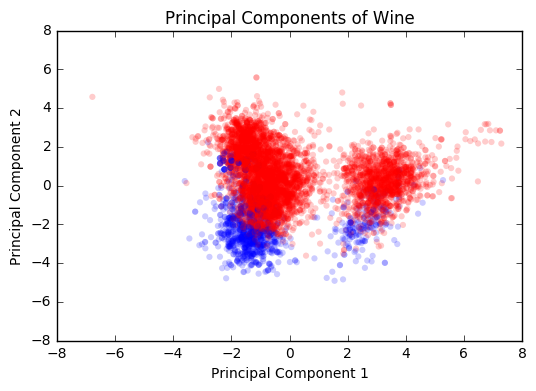

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0] 
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2, c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1"); plt.ylabel("Principal Component 2")
plt.show()

## Exercise 5

**Instructions**

- We are now ready to fit the wine data to our kNN classifier. Create a function ```accuracy(predictions, outcomes)``` that takes two lists of the same size as arguments and returns a single number, which is the percentage of elements that are equal for the two lists.
- Use ```accuracy``` to compare the percentage of similar elements in ```x = np.array([1,2,3])``` and ```y = np.array([1,2,4])```.
- Print your answer.


In [12]:
def accuracy(predictions, outcomes):
    return (100*np.mean(predictions == outcomes))

x = np.array([1,2,3])
y = np.array([1,2,4])
print (accuracy(x, y))

66.6666666667


## Exercise 6

**Instructions**

- The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. Use the accuracy function (preloaded into memory as defined in Exercise 5) to calculate how many wines in the dataset are of low quality. Accomplish this by calling accuracy with 0 as the first argument, and data["high_quality"] as the second argument.
- Print your result.


In [13]:
print (accuracy(0, data["high_quality"]))

80.3447745113


## Exercise 7

**Instructions**

- Use ```knn.predict(numeric_data)``` to predict which wines are high and low quality and store the result as ```library_predictions```.
- Use ```accuracy``` to find the accuracy of your predictions, using ```library_predictions``` as the first argument and ```data["high_quality"]``` as the second argument.
- Print your answer. Is this prediction better than the simple classifier in Exercise 6?


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
# Enter your code here!
library_predictions = knn.predict(numeric_data)

print (accuracy (library_predictions, data["high_quality"] ))

99.9692165615


## Exercise 8

**Instructions**

- Unlike the scikit-learn function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. To circumvent this, fix the random generator using ```random.seed(123)```, and select 10 rows from the dataset using ```random.sample(range(n_rows), 10)```. Store this selection as ```selection```.


In [17]:
n_rows = data.shape[0]
random.seed(123)
selection = random.sample(range(n_rows), 10)

## Exercise 9

**Instructions**

- The sample of 10 row indices are stored as selection from the previous exercise. For each predictor ```p``` in ```predictors[selection]```, use ```knn_predict(p, predictors[training_indices,:], outcomes, k=5)``` to predict the quality of each wine in the prediction set, and store these predictions as a ```np.array``` called ```my_predictions```. Note that ```knn_predict``` is already defined as in the Case 3 videos.
- Using the ```accuracy``` function, compare these results to the selected rows from the ```high_quality``` variable in ```data``` using ```my_predictions``` as the first argument and ```data.high_quality[selection]``` as the second argument. 
- Store these results as ```percentage```.
- Print your answer.


In [20]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(data["high_quality"])

#my_predictions = # Enter your code here!
my_predictions = np.array([knn_predict(p, predictors[training_indices,:], outcomes, k=5) for p in predictors[selection]])
#percentage = # Enter your code here!
percentage = accuracy(my_predictions, data.high_quality[selection])
print (percentage)

80.0
